In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
data_path = '/Users/ameliabaum/Desktop/Amelia/Berkeley Fall 2019/CY PLAN 257/Final Project/data/'


In [9]:
zcode_data = pd.read_csv(data_path+"zip_code_features.csv")
zcode_data.head()
zcode_data.columns

Index(['ZIP', 'num_sw', 'num_ndnw', 'num_pickdrop', 'num_discret', 'num_shop',
       'num_home', 'num_em', 'num_m', 'num_aft', 'num_evn', 'num_walk',
       'num_bike', 'num_auto', 'num_transit', 'num_other'],
      dtype='object')

In [24]:
# standard_data
features = zcode_data.columns[1:]
features

Index(['num_sw', 'num_ndnw', 'num_pickdrop', 'num_discret', 'num_shop',
       'num_home', 'num_em', 'num_m', 'num_aft', 'num_evn', 'num_walk',
       'num_bike', 'num_auto', 'num_transit', 'num_other'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
features = zcode_data.columns[1:]
# Separating out the features
x = zcode_data.loc[:, features].values
# Separating out the target
# y = zcode_data.loc[:,['ZIP']].values
# Standardizing the features
standard_data = StandardScaler().fit_transform(x)

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                         'principal component 4'])

In [65]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.423623,-0.083533,0.397452,0.197063
1,-1.745629,0.083720,0.201421,0.096383
2,-0.834414,-0.046175,0.043871,0.066960
3,-0.506615,0.124565,0.854259,0.318724
4,-1.221657,0.184625,0.725162,0.210071
5,-0.545340,0.145363,1.411196,0.456603
6,0.846554,0.330678,1.353075,0.431442
7,-1.395020,0.054581,0.299430,0.119837
8,-1.382444,0.143525,0.712080,0.228616
9,0.309316,0.514857,1.364059,0.566416


In [66]:
finalDf = pd.concat([principalDf, zcode_data[['ZIP']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,ZIP
0,-0.423623,-0.083533,0.397452,0.197063,90001
1,-1.745629,0.083720,0.201421,0.096383,90002
2,-0.834414,-0.046175,0.043871,0.066960,90003
3,-0.506615,0.124565,0.854259,0.318724,90004
4,-1.221657,0.184625,0.725162,0.210071,90005


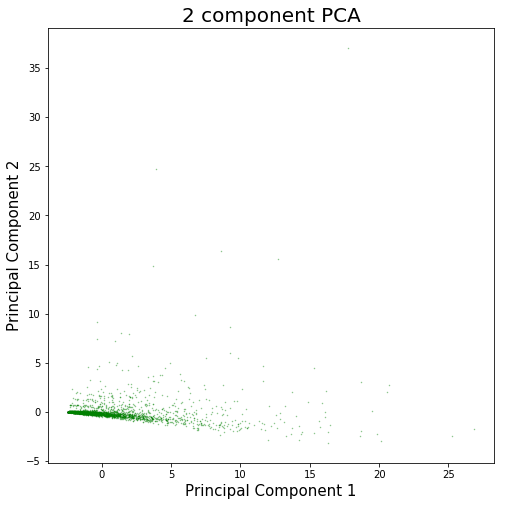

In [67]:
plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 

# targets = finalDf["ZIP"][0:2]
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['ZIP'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
ax = plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], color='g', alpha=.5, edgecolor='g', s=0.2)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.show()

In [68]:
explained = pca.explained_variance_ratio_
explained_sum = np.cumsum(explained)
# eigenvector = np.array(range(1,24))

print(explained_sum)
# print(len(eigenvector))

[0.69247122 0.7860315  0.83902699 0.87668953]
23


In [62]:
zcode_data.head()

,ZIP,num_sw,num_ndnw,num_pickdrop,num_discret,num_shop,num_home,num_em,num_m,num_aft,num_evn,num_walk,num_bike,num_auto,num_transit,num_other
0,90001,8,4,1,12,2,12,12,53,30,35,28,4,79,0,0
1,90002,6,2,5,2,0,1,1,22,14,9,16,0,22,0,0
2,90003,14,0,6,8,10,8,4,35,34,37,20,0,65,0,0
3,90004,8,4,6,10,5,5,8,29,33,48,49,4,46,0,0
4,90005,11,0,2,4,2,3,5,28,25,30,41,1,30,0,0
